<a href="https://colab.research.google.com/github/vladimbo/Bayesian/blob/master/VOLFORECAST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install quandl

In [ ]:
pip install arch

     |████████████████████████████████| 716kB 3.4MB/s 


In [ ]:
import seaborn
seaborn.mpl.rcParams['figure.figsize'] = (10.0, 6.0)
seaborn.mpl.rcParams['savefig.dpi'] = 130
seaborn.mpl.rcParams['font.family'] = 'sans-serif'
seaborn.mpl.rcParams['font.size'] = 14

In [ ]:
import quandl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sklearn
from sklearn import preprocessing
import scipy as scipy
from pandas.plotting import register_matplotlib_converters
import datetime as dt
register_matplotlib_converters()
quandl.ApiConfig.api_key = "tKx_xUfgtNyNkyLM9M2R"
today = dt.date.today()
dtindex = pd.date_range(start='2015-01-01', end=today, freq='D')
DBT = pd.DataFrame(index=dtindex)
cutoff = today - dt.timedelta(days=120)
cutss = today - dt.timedelta(days=10)

https://arch.readthedocs.io/en/latest/univariate/univariate_volatility_forecasting.html

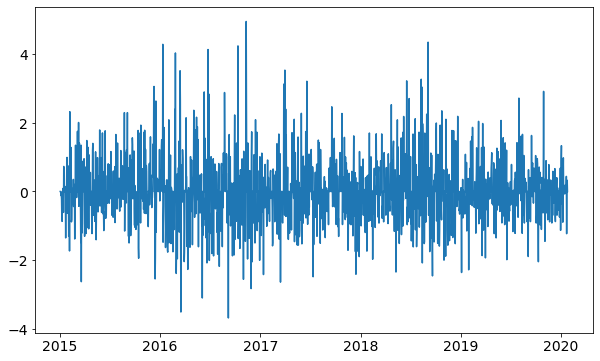

In [ ]:

import sys
from arch import arch_model


ticker_data = (quandl.get('CHRIS/ICE_ZR1/', start_date='2015-01-01', end_date=today))
ZAR = pd.concat([DBT, ticker_data['Settle']], axis=1)
ZAR.fillna(method='ffill', inplace=True)
ZAR.fillna(method='bfill', inplace=True)
ZAR.columns = ['ZAR']
returns = 100*ZAR.pct_change(1).dropna()

plt.plot(returns)

In [ ]:
am = arch_model(returns, vol='Garch', p=1, o=0, q=1, dist='Normal')
res = am.fit(update_freq=5)
forecasts = res.forecast()

Iteration:      5,   Func. Count:     38,   Neg. LLF: 2349.101587195295
Iteration:     10,   Func. Count:     74,   Neg. LLF: 2348.5267813654887
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2348.526654538974
            Iterations: 11
            Function evaluations: 81
            Gradient evaluations: 11


/usr/local/lib/python3.6/dist-packages/arch/univariate/base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.78. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)


In [ ]:
print(forecasts.mean.iloc[-3:])
print(forecasts.residual_variance.iloc[-3:])
print(forecasts.variance.iloc[-3:])

                 h.1
2020-01-23       NaN
2020-01-24       NaN
2020-01-25  0.017866
                 h.1
2020-01-23       NaN
2020-01-24       NaN
2020-01-25  0.419262
                 h.1
2020-01-23       NaN
2020-01-24       NaN
2020-01-25  0.419262


In [ ]:

forecasts = res.forecast(horizon=5)
print(forecasts.residual_variance.iloc[-3:])



                 h.1       h.2       h.3       h.4       h.5
2020-01-23       NaN       NaN       NaN       NaN       NaN
2020-01-24       NaN       NaN       NaN       NaN       NaN
2020-01-25  0.419262  0.422012  0.424742  0.427452  0.430143


In [ ]:
res = am.fit(last_obs=today, update_freq=5)
forecasts = res.forecast(horizon=5)
print(forecasts.variance.dropna().head())

Iteration:      5,   Func. Count:     38,   Neg. LLF: 2349.101587195295
Iteration:     10,   Func. Count:     74,   Neg. LLF: 2348.5267813654887
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2348.526654538974
            Iterations: 11
            Function evaluations: 81
            Gradient evaluations: 11
                 h.1       h.2       h.3       h.4       h.5
2020-01-25  0.419262  0.422012  0.424742  0.427452  0.430143


/usr/local/lib/python3.6/dist-packages/arch/univariate/base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.78. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)


In [ ]:
index = returns.index
start_loc = 0
end_loc = np.where(index >= '2020-1-5')[0].min()
forecasts = {}
for i in range(20):
    sys.stdout.write('.')
    sys.stdout.flush()
    res = am.fit(first_obs=i, last_obs=i + end_loc, disp='off')
    temp = res.forecast(horizon=3).variance
    fcast = temp.iloc[i + end_loc - 1]
    forecasts[fcast.name] = fcast
print()
print(pd.DataFrame(forecasts).T)

In [ ]:
index = returns.index
start_loc = 0
end_loc = np.where(index >= '2020-1-1')[0].min()
forecasts = {}
for i in range(20):
    sys.stdout.write('.')
    sys.stdout.flush()
    res = am.fit(last_obs=i + end_loc, disp='off')
    temp = res.forecast(horizon=3).variance
    fcast = temp.iloc[i + end_loc - 1]
    forecasts[fcast.name] = fcast
print()
FC = pd.DataFrame(forecasts)
plt.plot(FC)
print(pd.DataFrame(forecasts).T)


In [ ]:
# TARCH specification
am = arch_model(returns, vol='GARCH', power=2.0, p=1, o=1, q=1)
res = am.fit(update_freq=5)
forecasts = res.forecast()
print(forecasts.variance.iloc[-1])

Iteration:      5,   Func. Count:     44,   Neg. LLF: 2349.7477666544823
Iteration:     10,   Func. Count:     84,   Neg. LLF: 2345.5305120660278
Iteration:     15,   Func. Count:    125,   Neg. LLF: 2344.8624180883826
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2344.8505400514077
            Iterations: 18
            Function evaluations: 147
            Gradient evaluations: 18
h.1    0.416033
Name: 2020-01-25 00:00:00, dtype: float64


/usr/local/lib/python3.6/dist-packages/arch/univariate/base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.78. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)


(18262, 18286)

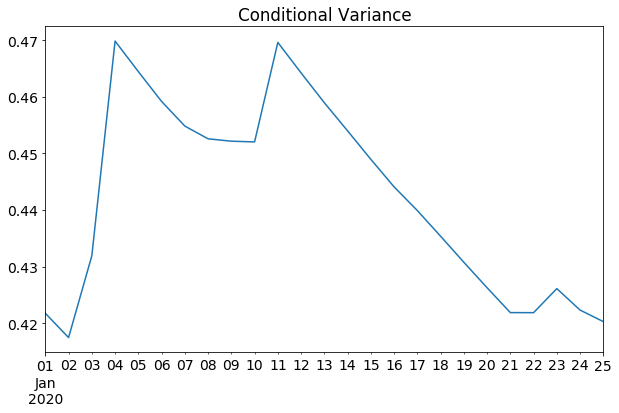

In [ ]:


import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
var_2016 = res.conditional_volatility['2020']**2.0
subplot = var_2016.plot(ax=ax, title='Conditional Variance')
subplot.set_xlim(var_2016.index[0], var_2016.index[-1])



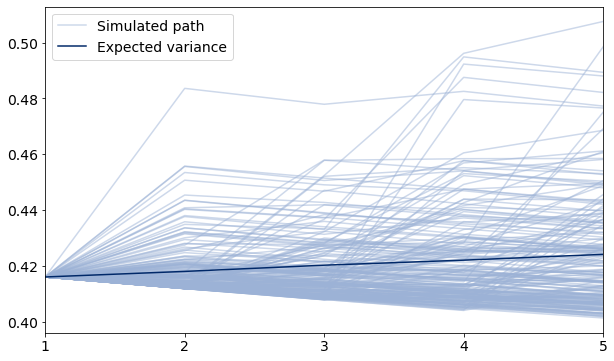

In [ ]:


forecasts = res.forecast(horizon=5, method='simulation')
sims = forecasts.simulations

x = np.arange(1, 6)
lines = plt.plot(x, sims.residual_variances[-1, ::5].T, color='#9cb2d6', alpha=0.5)
lines[0].set_label('Simulated path')
line = plt.plot(x, forecasts.variance.iloc[-1].values, color='#002868')
line[0].set_label('Expected variance')
plt.gca().set_xticks(x)
plt.gca().set_xlim(1,5)
legend = plt.legend()



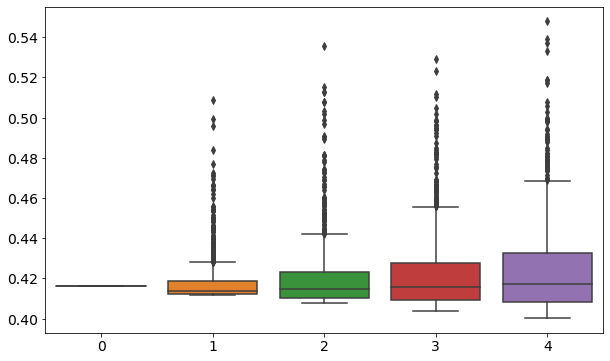

In [ ]:
import seaborn as sns
sns.boxplot(data=sims.variances[-1])

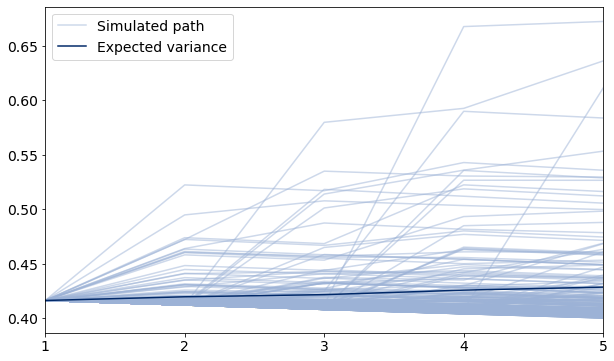

In [ ]:
forecasts = res.forecast(horizon=5, method='bootstrap')
sims = forecasts.simulations

lines = plt.plot(x, sims.residual_variances[-1, ::5].T, color='#9cb2d6', alpha=0.5)
lines[0].set_label('Simulated path')
line = plt.plot(x, forecasts.variance.iloc[-1].values, color='#002868')
line[0].set_label('Expected variance')
plt.gca().set_xticks(x)
plt.gca().set_xlim(1,5)
legend = plt.legend()

In [ ]:
am = arch_model(returns, vol='Garch', p=1, o=0, q=1, dist='skewt')
res = am.fit(disp='off', last_obs='2020-1-25')

/usr/local/lib/python3.6/dist-packages/arch/univariate/base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.7804. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)


In [ ]:
forecasts = res.forecast(start='2020-1-1')
cond_mean = forecasts.mean['2020':]
cond_var = forecasts.variance['2020':]
q = am.distribution.ppf([0.01, 0.05], res.params[-2:])
print(q)

[-1.91885754 -0.86399274]


KeyError: ignored

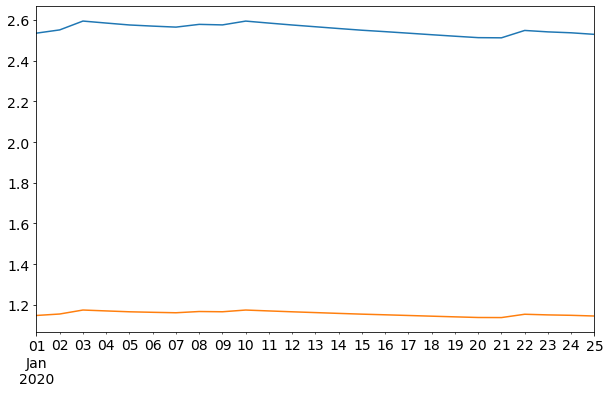

In [ ]:
value_at_risk = -cond_mean.values - np.sqrt(cond_var).values * q[None, :]
value_at_risk = pd.DataFrame(
    value_at_risk, columns=['1%', '5%'], index=cond_var.index)
ax = value_at_risk.plot(legend=False)
xl = ax.set_xlim(value_at_risk.index[0], value_at_risk.index[-1])
rets_2018 = returns['2020':].copy()
rets_2018.name = 'Asset Return'
c = []
for idx in value_at_risk.index:
    if rets_2018[idx] > -value_at_risk.loc[idx, '5%']:
        c.append('#000000')
    elif rets_2018[idx] < -value_at_risk.loc[idx, '1%']:
        c.append('#BB0000')
    else:
        c.append('#BB00BB')
c = np.array(c, dtype='object')
labels = {
    '#BB0000': '1% Exceedence',
    '#BB00BB': '5% Exceedence',
    '#000000': 'No Exceedence'
}
markers = {'#BB0000': 'x', '#BB00BB': 's', '#000000': 'o'}
for color in np.unique(c):
    sel = c == color
    ax.scatter(
        rets_2018.index[sel],
        -rets_2018.loc[sel],
        marker=markers[color],
        c=c[sel],
        label=labels[color])
ax.set_title('Parametric VaR')
leg = ax.legend(frameon=False, ncol=3)

In [ ]:
import pandas as pd
df = pd.concat([
    forecasts.residual_variance.iloc[-1],
    sim_forecasts.residual_variance.iloc[-1],
    scenario_forecasts.residual_variance.iloc[-1],
    bs_forecasts.residual_variance.iloc[-1]
], 1)
df.columns = ['Analytic', 'Simulation', 'Scenario Sim', 'Bootstrp Scenario']
# Plot annualized vol
subplot = np.sqrt(252 * df).plot(legend=False)
legend = subplot.legend(frameon=False)

NameError: ignored